# Lab 6: Graphs II

Lab associated with Module 6: Graphs II

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import math

In [4]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Graph Preliminaries

Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [5]:
class Node:

    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []

        self.status = "unvisited"
        self.estD = np.inf

    def hasOutNeighbor(self, v):

        if v in self.outNeighbors:
            return True

        return False

    def hasInNeighbor(self, v):

        if v in self.inNeighbors:
            return True

        return False

    def hasNeighbor(self, v):

        if v in self.inNeighbors or v in self.outNeighbors:
            return True

        return False

    def getOutNeighbors(self):

        return self.outNeighbors

    def getInNeighbors(self):

        return self.inNeighbors

    def getOutNeighborsWithWeights(self):

        return self.outNeighbors

    def getInNeighborsWithWeights(self):

        return self.inNeighbors

    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------

    def addOutNeighbor(self,v,wt):

        self.outNeighbors.append((v,wt))

    def addInNeighbor(self,v,wt):

        self.inNeighbors.append((v,wt))


    def __str__(self):

        return str(self.value)

In [6]:
class Graph:

    def __init__(self):

        self.vertices = []

    def addVertex(self,n):

        self.vertices.append(n)

    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------

    def addDiEdge(self, u, v, wt = 1):

        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)

    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):

        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)


    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):

        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret

    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):

        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):

            if v.hasOutNeighbor(u) and u.hasInNeighbor(v):
                return

            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)

    def __str__(self):

        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Now that we have incorporated the weights, let us devise a plan to generate the graph

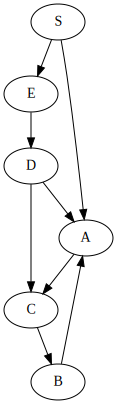

In [7]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

In [8]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

In [9]:
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -1)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -2 )

Second Example

In [10]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G.addVertex( Node(i) )

V = G.vertices

G.addDiEdge( V[0], V[1], 3)

G.addDiEdge( V[0], V[2] , 4)

G.addDiEdge( V[2], V[1], -2)

In [11]:
print(G)

Graph with:
	 Vertices:
	S,A,B,
	 Edges:
	(S,(<__main__.Node object at 0x7dd77a8979a0>, 3)) (S,(<__main__.Node object at 0x7dd77a896620>, 4)) (B,(<__main__.Node object at 0x7dd77a8979a0>, -2)) 



***

### Section 2: Dijkstra Algorithm

In [12]:
len(G.vertices)

3

In [13]:
def dijkstra(w, G):

    for v in G.vertices:
        v.estD = math.inf

    w.estD = 0
    unsureVertices = G.vertices[:]

    sureVertices = []

    while len(unsureVertices) > 0:

        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x

        if u == None:
            # then there is nothing more that I can reach
            return

        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():

            if v in sureVertices:
                continue

            if u.estD + wt < v.estD:
                v.estD = u.estD + wt

        unsureVertices.remove(u)
        sureVertices.append(u)

    # that's it!  Now each vertex holds estD which is its distance from w

In [14]:
w = G.vertices[0]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S 0
A 3
B 4


***

## Dijkstra Algorithm
-       Single-Source Shortest Path Algorithm
-       Selects one node (root) and build a search based on the selected node using greedy approach
-      When considering neighbours of u, do not consider neighbours that have already been explored (‘sure’ status)
To find the shortest path between a node to all other nodes:
-   Each node stores a table with length of the shortest path from that node to all other nodes in the graph.
-       Shortest path (cost) and map to traverse the shortest path.
1.     Pick a node with smallest value in matrix d, labelled ‘I’m not sure yet’ status (smallest estimate path to current node).
2.     Update the neighbours of u
3.     Mark current node u as explored ‘sure’, other nodes update based on distance (u with min d[u])
4.     Repeat analysis until all nodes have been explores

-       Issues:
o   Negative weights – this form of Dijkstra cannot handle this.
o   If weight are changed, Dijkstra must be re-run.


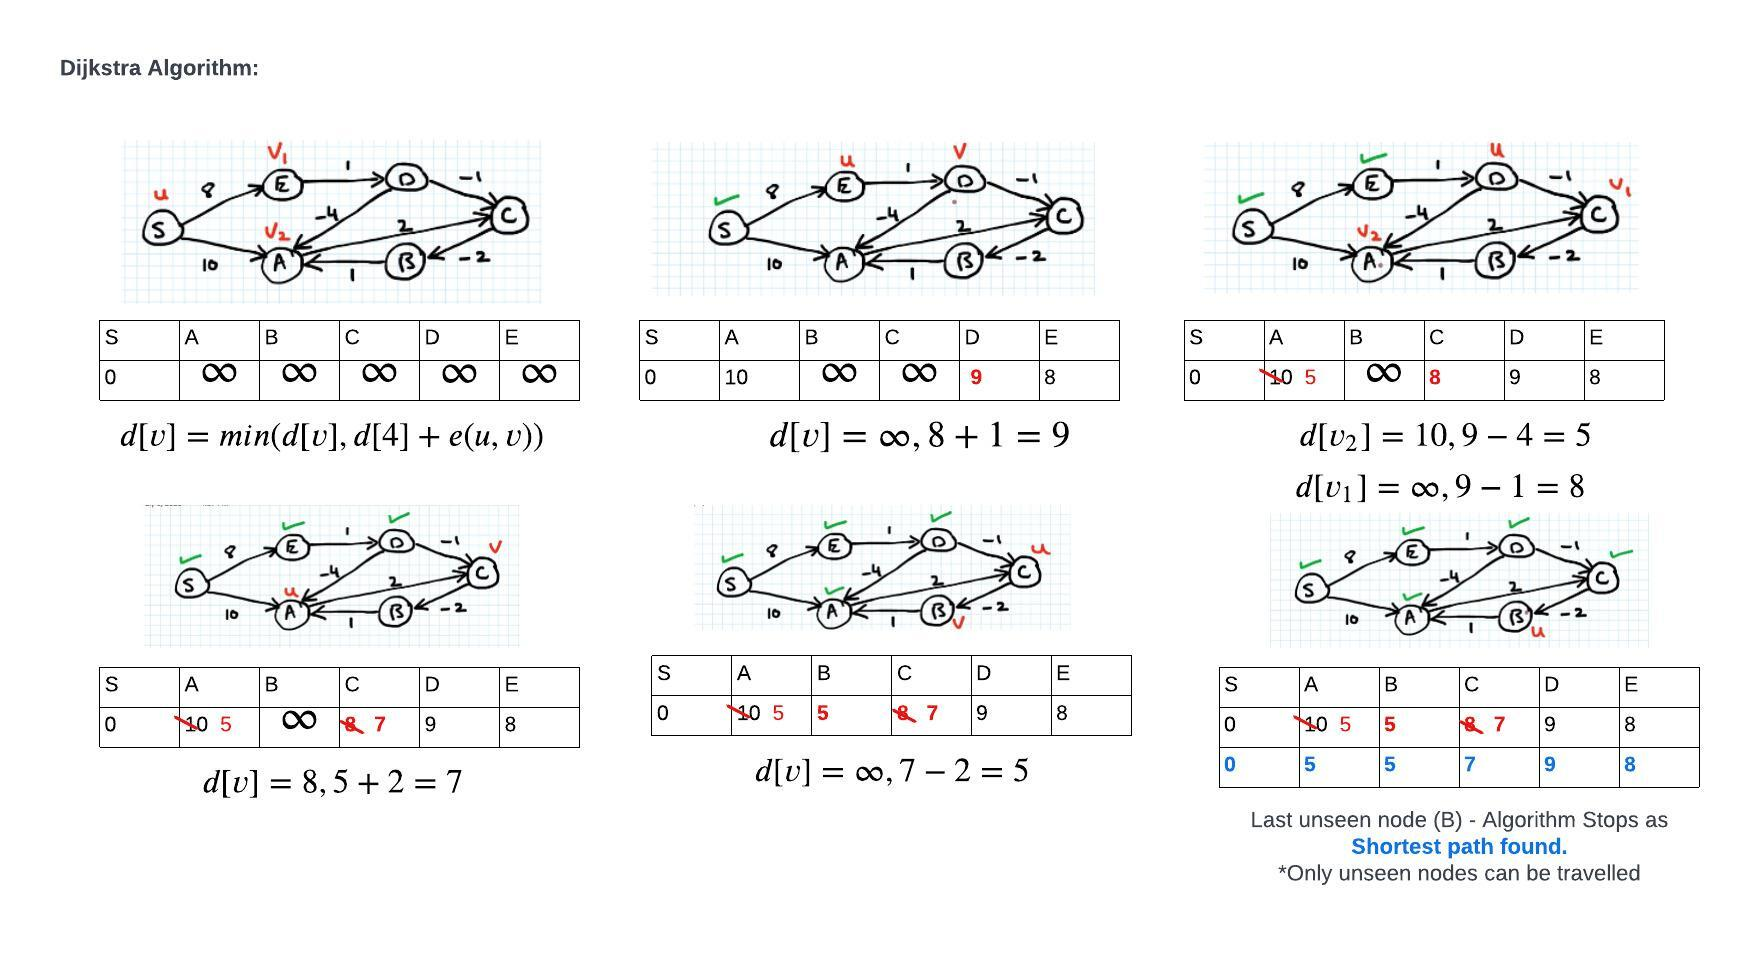

### <font color='red'> Activity 1: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>

## Bellman-Ford (BF) algorithm - Array based approach
-       A variant of Dijkstra that can handle negative weights – slower
-       Finds the shortest paths from a node to all other nodes in a weighted graph, even if it has negative weight edges. Negative weight cycle: Sum of edge weights are negative.
-       No labelling of nodes ‘sure/unsure’
-       Select all nodes as neighbours when considering neighbours of u
-       It is the selection of nodes that are to be explored.
1. Greedy option – picking only one node during exploration
2. Select nodes 1-by-1 a de-centralised algorithm (flexible in changing weights)


##### *The first loop relaxes each of the edges int eh graph n - 1 times. After n- 1 iterations, the distances are guaranteed to be correct.*

### Modify Algorithm Detect if there are any negative cycles:
-     Run (n + 1 or n + 2) and see if results distance change, if they do than exit Bellman Ford.

### Bellman-Ford Algorithm O(m x n)
* Analyses each edge m, at least n-1 times.



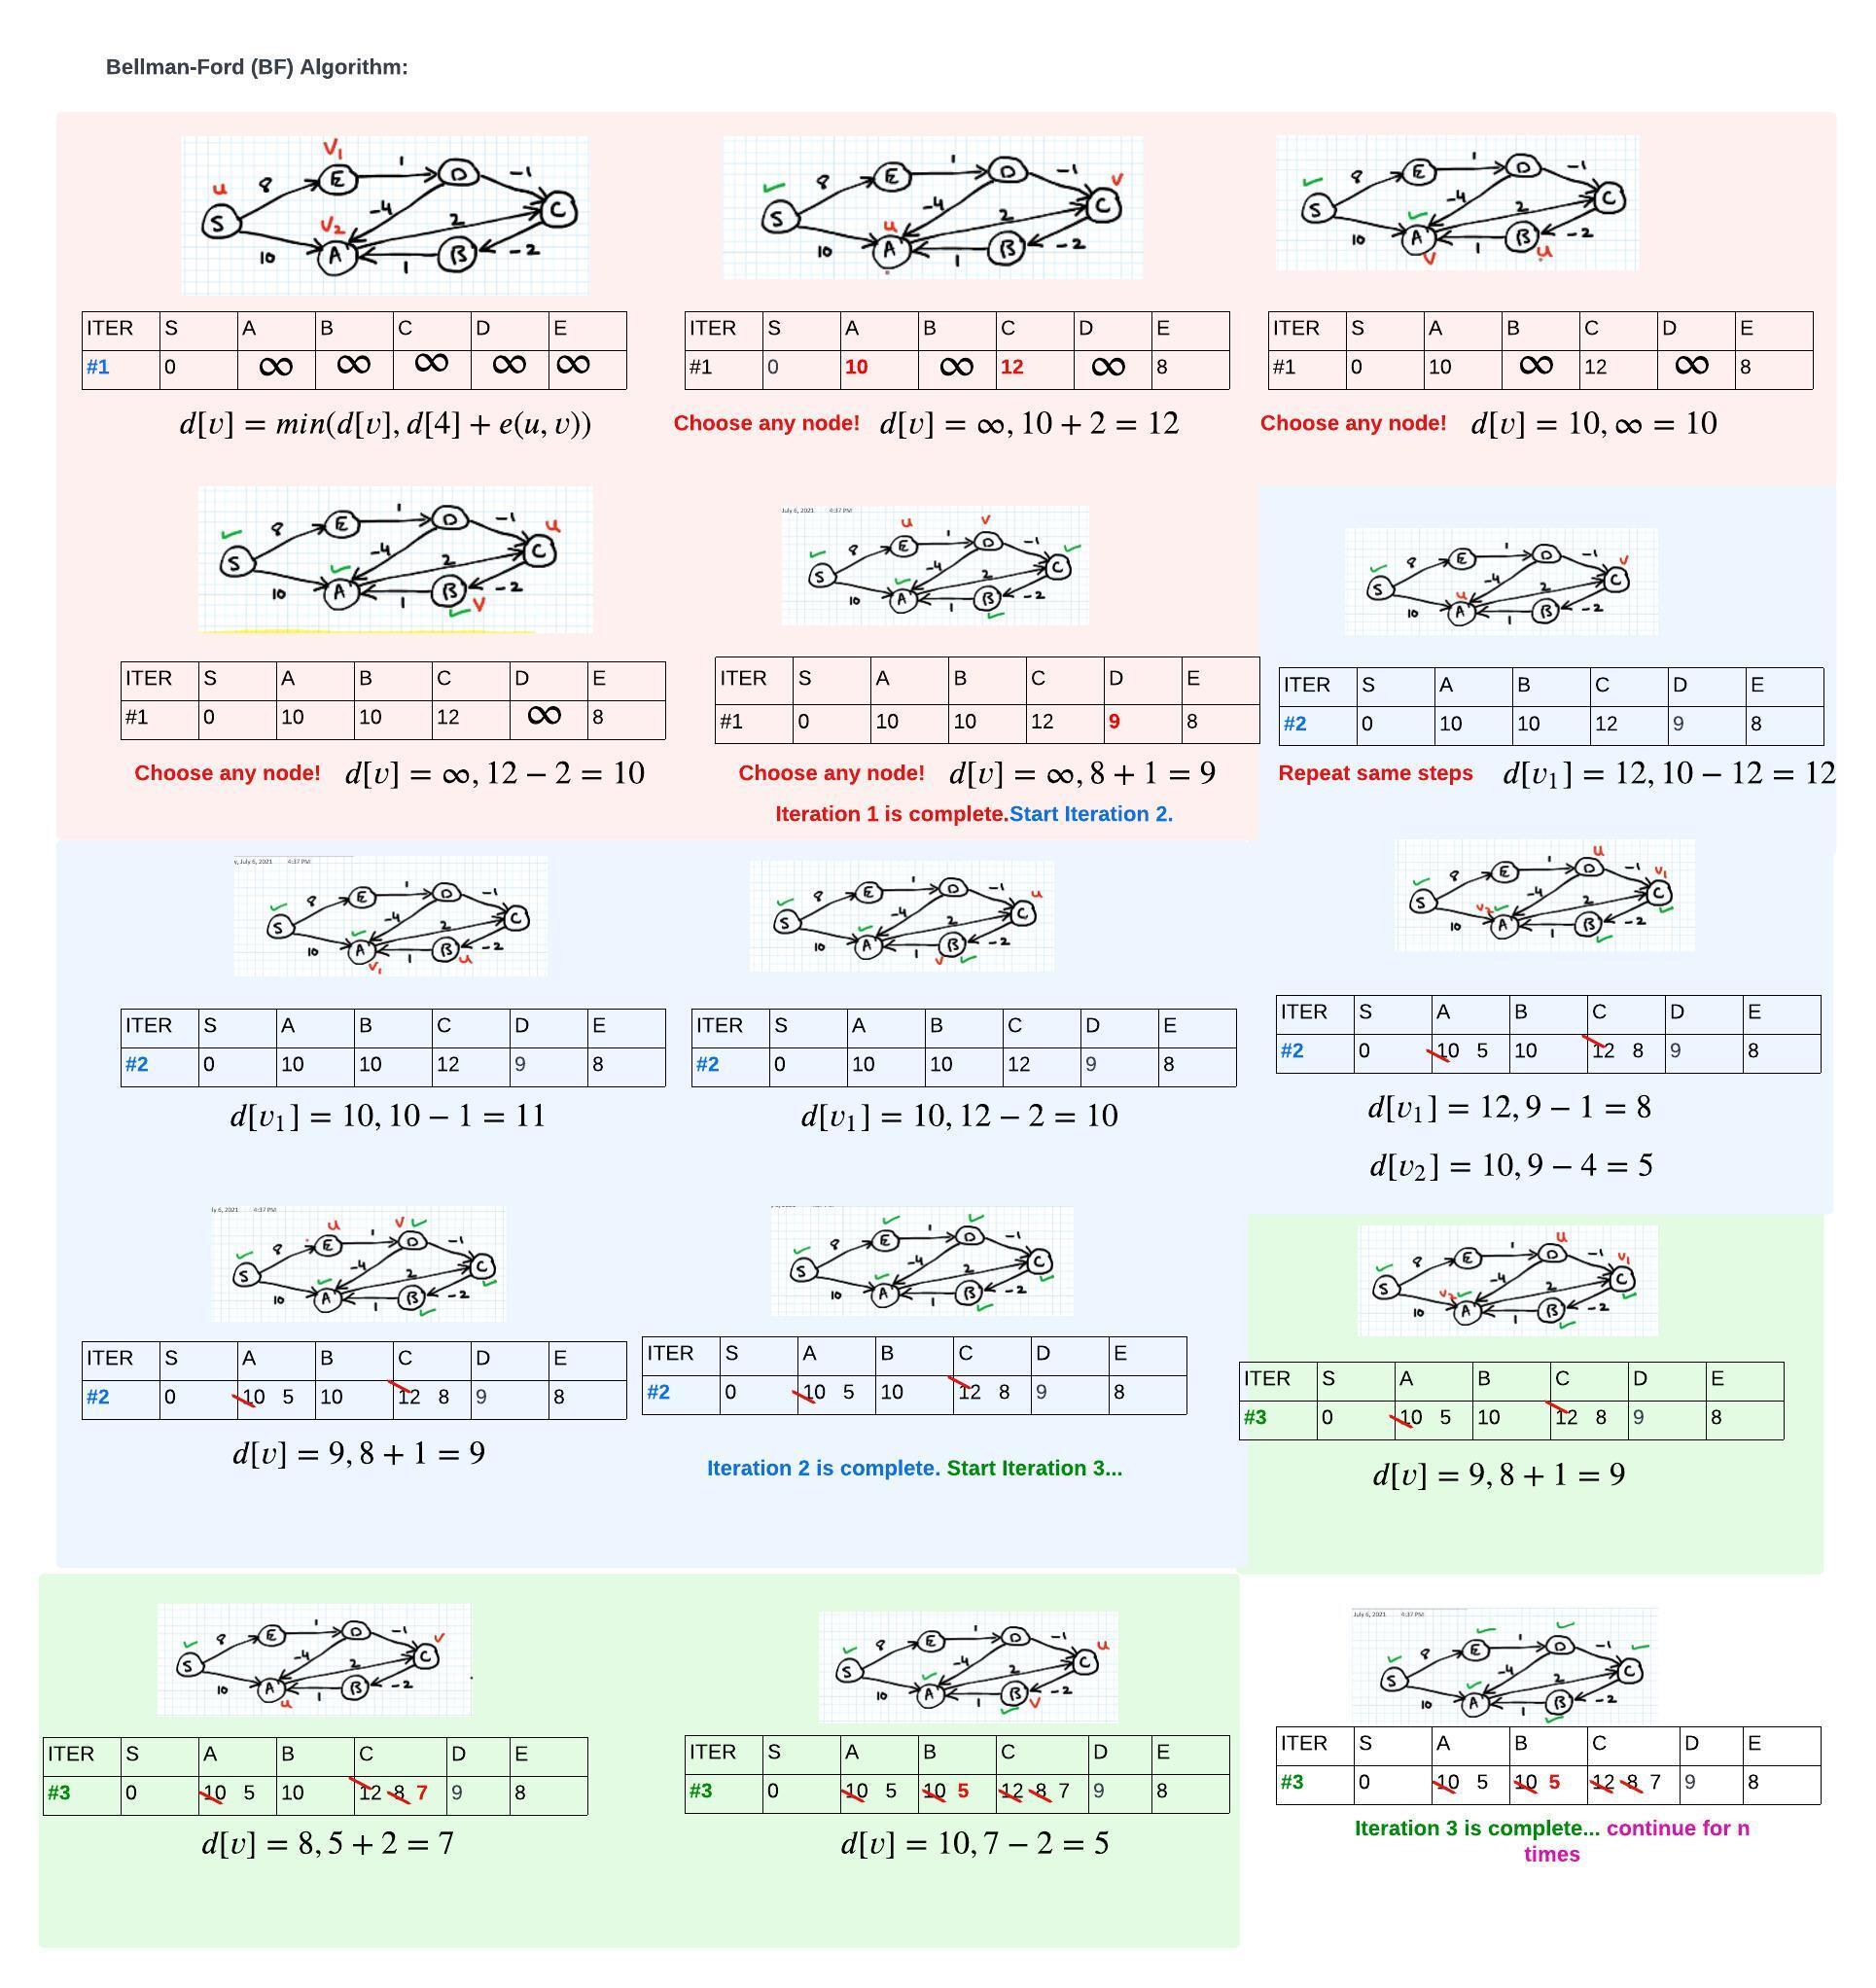

In [15]:
# Bellman-Ford (BF) - array based approach
def bf_algorithm(source, G):
  source.estD = 0 # Distance from starting node to itself = 0

  # Relaxation for v-1 iterations (v number of nodes/ vertices in graph)
  for nodes in range(len(G.vertices) - 1):
    for u in G.vertices: # Search all nodes in graph

      # Iterate over the out neighbours of current node u.
      # For each v and weight (wt), calcualte potential new difference
      for v, wt in u.getOutNeighborsWithWeights():
        # Calculate new dist from start node to neighbor v, add weight of edge betwen u and v
        new_distance = u.estD + wt
        # Line below used for debugging
        #print(f"Checking edge: {u.value} -> {v.value} (Weight: {wt}), New Distance: {new_distance}")

        # If new dist is shorter than est dist of neighbor v -> update
        if new_distance < v.estD:
          v.estD = new_distance

  # Check for Negative cycle outside main relaxation loop
  # Checks for any further relaxations after v-1 insertions
  # For each vertex u in graph nodes/ vertices check edge weights
  for u in G.vertices:
    # Check out neighbors of u
    for v, wt in u.getOutNeighborsWithWeights():
      # Further iterations/ relaxation can be found even after the main iteration is complete
      # Potential for ongoing for ever loops
      if u.estD + wt < v.estD:
        print("****Found negative cycle!****")
        return # Stop algorithm due to neg cycle

## TestCase 1: Graph which is connected (non-negative weights/ cycle)

Shortest Distance: 
Distance from A to Node: S Distance: 0
Distance from A to Node: A Distance: 2
Distance from A to Node: B Distance: 4


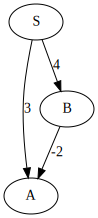

In [16]:
# Test BF
# Reset estimated distances before running Bellman-Ford
for v in G.vertices:
  v.estD = np.inf

# Run BF
distance = bf_algorithm(G.vertices[0], G)  # Root node vertex = S

# Print shortest distances
print("Shortest Distance: ")
for v in G.vertices:
  print(f"Distance from A to Node: {v.value} Distance: {v.estD}")

dot1 = Digraph()
dot1.edge('S', 'A', label='3')
dot1.edge('S', 'B', label='4')
dot1.edge('B', 'A', label='-2')
dot1

## TestCase 2: Test Negative weights in a graph

##### Run (n + 1 or n + 2) and see if results distance change if they do than exit Bellman Ford.
-       BF can detect negative cycles in graph by observing changes in the estimated distance during the relaxation process.
-       Negative cycle: cycle in which the sum of the edge weights along the cycle is negative.
-       IF BF algorithm detects a negative cycle there is no well-defined shortest path since you can keep going and going and going around the cycle and continually decrease the path length.


New Graph: 
Graph with:
	 Vertices:
	A,B,C,
	 Edges:
	(A,(<__main__.Node object at 0x7dd77a896c20>, 1)) (A,(<__main__.Node object at 0x7dd77a896f80>, 0)) (B,(<__main__.Node object at 0x7dd77a896f80>, -3)) 

Shortest Distance: 
Distance from A to Node: A Distance: 0
Distance from A to Node: B Distance: 1
Distance from A to Node: C Distance: -2


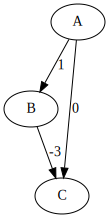

In [17]:
# Graph with a negative cycle
G1 = Graph()

for i in ['A', 'B', 'C']:
  G1.addVertex(Node(i))

V_cycle = G1.vertices

G1.addDiEdge(V_cycle[0], V_cycle[1], 1)
G1.addDiEdge(V_cycle[1], V_cycle[2], -3)
G1.addDiEdge(V_cycle[0], V_cycle[2], 0)

print("New Graph: ")
print(G1)

# Reset est distances then run BF
for v in G1.vertices:
  v.estD = np.inf

# Run BF
bf_algorithm(G1.vertices[0], G1) # Root node vertex = A

# Print shortest distances
print("Shortest Distance: ")
for v in G1.vertices:
  print(f"Distance from A to Node: {v.value} Distance: {v.estD}")

dot2 = Digraph()
dot2.edge('A', 'B', label='1')
dot2.edge('B', 'C', label='-3')
dot2.edge('A', 'C', label='0')
dot2

## TestCase 3: Test Negative Cycle in a graph

New Graph: 
Graph with:
	 Vertices:
	A,B,C,
	 Edges:
	(A,(<__main__.Node object at 0x7dd77a897400>, 1)) (B,(<__main__.Node object at 0x7dd77a8b44f0>, -3)) (C,(<__main__.Node object at 0x7dd77a896980>, 0)) 

****Found negative cycle!****
Shortest Distance: 
Distance from A to Node: A Distance: -4
Distance from A to Node: B Distance: -1
Distance from A to Node: C Distance: -4


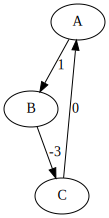

In [18]:
# Graph with a negative cycle
G2 = Graph()

for i in ['A', 'B', 'C']:
  G2.addVertex(Node(i))

V_cycle = G2.vertices

G2.addDiEdge(V_cycle[0], V_cycle[1], 1)
G2.addDiEdge(V_cycle[1], V_cycle[2], -3)
G2.addDiEdge(V_cycle[2], V_cycle[0], 0)

print("New Graph: ")
print(G2)

# Reset est distances then run BF
for v in G2.vertices:
  v.estD = np.inf

# Run BF
bf_algorithm(G2.vertices[0], G2) # Root node vertex = A

# Print shortest distances
print("Shortest Distance: ")
for v in G2.vertices:
  print(f"Distance from A to Node: {v.value} Distance: {v.estD}")

dot3 = Digraph()
dot3.edge('A', 'B', label='1')
dot3.edge('B', 'C', label='-3')
dot3.edge('C', 'A', label='0')
dot3

# Compare the time complexity of the proposed Bellman-ford method with Dijkstra
#### Time Complexities
- Bellman-Ford (array) O(V*E) (my implementation)
- Bellman-Ford (queue) O(E*(Log(V)))
  - number of vertices and edges.
- When detection found after V-1 iteratinos complexity O(E), number of edges.

- Dijkstra (array) O(v^2), v is number of vertices (which is the type that is presented here).
- Dijkstra (heap, priority queue), O((V + E)* log(V)), E is number of edges.

- Both algorithms have produced the same shortest distance (S (0) -> A (2) -> B (4)).

#### Comparison
- Dijkstra can be more efficient when a graph has low number of edges.

### Test case 1
##### Results
- Dijkstra time: 0.000116 seconds
- Bellman-Ford time: 0.000167 seconds
- Dijkstra performs better on non-negative edge weights.
- This is because it is a greedy algorithm, finds shortest path from single source, produces poor results with negative weights in graph.

### Test case 2
##### Results
- Dijkstra time: 0.002855 seconds
- Bellman-Ford time: 0.000242 seconds
- Bellman-ford can be more efficient when a graph has many edges.

## Conclusion
- Dijsktra useful for graphs with nonnegative weights.
- Dijsktra is more efficient for sparse graphs.
- Bellman-Ford better for graphs with negative weights, cycles of more dense.
- Bellman-Ford useful for negative weight cycles and negative edge weights, but this comes at a cost of time.

In [19]:
import time

#graph with few edges
sparse_graph = Graph()

# Add vertices
for i in range(1, 11):
  sparse_graph.addVertex(Node(str(i)))

V_sparse = sparse_graph.vertices

# Add a few edges
sparse_graph.addDiEdge(V_sparse[0], V_sparse[1], 3)
sparse_graph.addDiEdge(V_sparse[0], V_sparse[2], 2)
sparse_graph.addDiEdge(V_sparse[1], V_sparse[3], 5)
sparse_graph.addDiEdge(V_sparse[2], V_sparse[3], 1)

# Time for Dijkstra's algorithm
start_time = time.time()
dijkstra(V_sparse[0], sparse_graph)
dijkstra_execution_time = time.time() - start_time

# Reset est distances for Bellman-Ford
for v in V_sparse:
  v.estD = float('inf')

# Time for Bellman-Ford algorithm
start_time = time.time()
bf_algorithm(V_sparse[0], sparse_graph)
bf_execution_time = time.time() - start_time

# Compare times
print(f"Dijkstra time: {dijkstra_execution_time:.6f} seconds")
print(f"Bellman-Ford time: {bf_execution_time:.6f} seconds")



Dijkstra time: 0.000116 seconds
Bellman-Ford time: 0.000167 seconds


## Test Case 2

In [20]:
import random
# Create a dense graph with many edges
dense_graph = Graph()

# Add vertices
for i in range(1, 11):
  dense_graph.addVertex(Node(str(i)))

V_dense = dense_graph.vertices

# Add edges
for i in range(10):
  for j in range(i + 1, 10):
      dense_graph.addDiEdge(V_dense[i], V_dense[j], random.randint(1, 10))

# Time for Dijkstra's algorithm
start_time = time.time()
dijkstra(V_dense[0], dense_graph)
dijkstra_execution_time = time.time() - start_time

# Reset est distances for Bellman-Ford
for v in V_dense:
  v.estD = float('inf')

# Time for Bellman-Ford algorithm
start_time = time.time()
bf_algorithm(V_dense[0], dense_graph)
bf_execution_time = time.time() - start_time

# Compare times
print(f"Dijkstra time: {dijkstra_execution_time:.6f} seconds")
print(f"Bellman-Ford time: {bf_execution_time:.6f} seconds")


Dijkstra time: 0.002855 seconds
Bellman-Ford time: 0.000242 seconds


***

### <font color='red'> Activity 2: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>

## Floyd-Warshall
- A dynamic programming algorithm to find the shortest paths between all pairs of vertices in a weighted graph.
- All-Pairs Shortest Paths (ASPS)
- The shortest path from u to v for all pairs (u, v) of vertices in the graph
- Find the shortest path between any pair of nodes in the graph.

### Algorithm:
- Initialize a distance matrix dist of size VxV,
    - Where V is the number of vertices in the graph.
- For each vertex i,
    - set dist[i][i] = 0
    - for each edge (i, j) with weight w,
        - set dist[i][j] = w.
    - For each intermediate vertex k from 1 to V,
     - iterate over all pairs of vertices (i, j)
    - Update dist[i][j],
    - dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
- matrix dist[i][i] = shortest paths between all pairs of nodes/ vertices.


### Complexity:
- Running complexity is O(n^3)
- Not better than running Dijkstra n times
- Simpler to implement and handle negative weights
- Storage: store two n-by-n arrays and graph (original)


In [21]:
#### TODO ####
### Good Luck ###

# Floyd Warshall (fw_algorithm)
def fw_algorithm(G):
  n = len(G.vertices) # Find number of nodes/ vertices in graph (G)

  # Create list, distances between pair nodes
  # To start all distances are set to infinity
  dist = [[math.inf] * n for nodes in range(n)]

  # Set node self reference in distance matrix to 0
  for i in range(n):
    dist[i][i] = 0

    # Set each node edge distance to distance matrix
    for v, wt in G.vertices[i].getOutNeighborsWithWeights():
      j = G.vertices.index(v)
      dist[i][j] = wt

    # Find shortest path all pairs of nodes/ vertices
    for k in range(n):
      for i in range(n):
        for j in range(n):
            dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

  # Check for negative weight cycle
  # Checks diagonal elements in the distance matrix if any < 0 = neg weight cycle
  if any(dist[i][i] < 0 for i in range(n)):
      print("Negative Weight Cycle found!")
      return

  # Print shortest paths
  for i in range(n):
      for j in range(n):
        if dist[i][j] == math.inf:
          print(f"Shortest path from {G.vertices[i].value} to {G.vertices[j].value}: No path")
        else:
          print(f"Shortest path from {G.vertices[i].value} to {G.vertices[j].value}: {dist[i][j]}")

## TestCase 1: Graph which is connected (non-negative)

Shortest path from S to S: 0
Shortest path from S to A: 2
Shortest path from S to B: 4
Shortest path from A to S: No path
Shortest path from A to A: 0
Shortest path from A to B: No path
Shortest path from B to S: No path
Shortest path from B to A: -2
Shortest path from B to B: 0


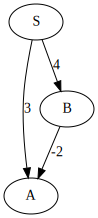

In [22]:
fw_algorithm(G)
dot1

## TestCase 2: Test Negative weights in a graph

Shortest path from A to A: 0
Shortest path from A to B: 1
Shortest path from A to C: -2
Shortest path from B to A: No path
Shortest path from B to B: 0
Shortest path from B to C: -3
Shortest path from C to A: No path
Shortest path from C to B: No path
Shortest path from C to C: 0


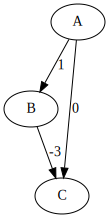

In [23]:
fw_algorithm(G1)
dot2

## TestCase 3: Test Negative Cycle in a graph

Negative Weight Cycle found!


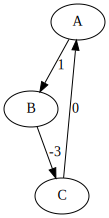

In [24]:
fw_algorithm(G2)
dot3

***

***